In [48]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

from statannotations.Annotator import Annotator
warnings.simplefilter(action='ignore', category=FutureWarning)


In [49]:
def get_filtered_df(data_dir, part, cell_nums, set_num):
    df = pd.DataFrame({})
    for i, file_name in enumerate(os.listdir(data_dir)):
        file_path = data_dir+"\\"+file_name
        if file_name.__contains__(part):
            current_num = file_name.split('_')[0]
            if any(current_num == num for num in cell_nums):
                actin_df = pd.read_csv(file_path)
                # filter df based on actin length. For that analysis we use >= 1 um
                actin_df["cell num"] = file_name.split('_')[0]
                actin_df["set num"] = set_num
                if part == 'cap':
                    actin_df["part"] = 'apical'
                elif part == 'bottom':
                    actin_df["part"] = 'basal'
                elif part == 'cell':
                    actin_df["part"] = 'whole'
                actin_df = actin_df.loc[actin_df['Actin Length'] >= 1]
                df = df.append(actin_df)
    return df


## Control Data Set

In [50]:
cnt_df = pd.DataFrame({})

# First Control data set
data_dir_cnt_set1 = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Control\2022.01.25_KASH_cnt_analysis_data\actin_stat"
Cell_num_cnt_set1 = ["1", "2", "3", "4", "6", "7", "8", "9", "11", "12", "16"]

# Second Control data set
data_dir_cnt_set2 = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Control\2022.01.28_KASH_cnt_2set_0-8_cells_analysis_data\analysis_data\actin_stat"
Cell_num_cnt_set2 = ["1", "2", "3", "4", "5", "6", "7", "8"]
cnt_df

""


#### Actin cap statistics

In [51]:
cnt_cap_set1_df = get_filtered_df(data_dir_cnt_set1, "cap", Cell_num_cnt_set1, 1)
cnt_cap_set2_df = get_filtered_df(data_dir_cnt_set2, "cap", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_cap_df = cnt_cap_set1_df.append(cnt_cap_set2_df)
cnt_df = cnt_df.append(cnt_cap_df)

#### Actin bottom statistics

In [52]:
cnt_bottom_set1_df = get_filtered_df(data_dir_cnt_set1, "bottom", Cell_num_cnt_set1, 1)
cnt_bottom_set2_df = get_filtered_df(data_dir_cnt_set2, "bottom", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_bottom_df = cnt_bottom_set1_df.append(cnt_bottom_set2_df)

cnt_df = cnt_df.append(cnt_bottom_df)
cnt_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
0,0,2.17634,0.017762,0.038656,38,0,NaN,NaN,11,1,apical
1,1,10.35232,0.117989,1.221459,177,0,NaN,NaN,11,1,apical
2,2,4.58796,0.086745,0.397981,79,0,NaN,NaN,11,1,apical
12,12,19.70470,0.130620,2.573824,336,0,NaN,NaN,11,1,apical
20,20,10.64642,0.128666,1.369827,182,0,NaN,NaN,11,1,apical
...,...,...,...,...,...,...,...,...,...,...,...
604,604,3.82330,0.096852,0.370296,66,0,NaN,NaN,8,2,basal
634,634,4.29386,0.132631,0.569500,74,0,NaN,NaN,8,2,basal
659,659,2.70572,0.079745,0.215767,47,0,NaN,NaN,8,2,basal
678,678,2.70572,0.084813,0.229481,47,0,NaN,NaN,8,2,basal


#### Actin whole cells statistics

In [53]:
cnt_cell_set1_df = get_filtered_df(data_dir_cnt_set1, "cell", Cell_num_cnt_set1, 1)
cnt_cell_set2_df = get_filtered_df(data_dir_cnt_set2, "cell", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_cell_df = cnt_cell_set1_df.append(cnt_cell_set2_df)

cnt_df = cnt_df.append(cnt_cell_df)
cnt_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
0,0,2.17634,0.017762,0.038656,38,0,NaN,NaN,11,1,apical
1,1,10.35232,0.117989,1.221459,177,0,NaN,NaN,11,1,apical
2,2,4.58796,0.086745,0.397981,79,0,NaN,NaN,11,1,apical
12,12,19.70470,0.130620,2.573824,336,0,NaN,NaN,11,1,apical
20,20,10.64642,0.128666,1.369827,182,0,NaN,NaN,11,1,apical
...,...,...,...,...,...,...,...,...,...,...,...
173,1159,1.05876,0.091527,0.096905,19,0,NaN,NaN,8,2,whole
174,1454,1.05876,0.042629,0.045134,19,0,NaN,NaN,8,2,whole
175,1481,1.05876,0.043883,0.046461,19,0,NaN,NaN,8,2,whole
176,1608,1.05876,0.030927,0.032744,19,0,NaN,NaN,8,2,whole


## Doc Data Set

In [54]:
dox_df = pd.DataFrame({})

# Combined Doc data set
data_dir_doc = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Doxycycline\actin_stat_set2_combined"
Cell_num_doc = ["2", "3", "4", "5", "6", "7", "9", "10", "11", "12",
               "13", "14", "18", "19", "20", "18", "22", "24", "26"]

#### Actin cap statistics

In [55]:
dox_cap_df = get_filtered_df(data_dir_doc, "cap", Cell_num_doc, 1)

dox_df = dox_df.append(dox_cap_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,apical
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,apical
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,apical
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,apical
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,apical
...,...,...,...,...,...,...,...,...,...,...,...
344,344,1.11758,0.023425,0.026179,20,0,NaN,NaN,9,1,apical
359,359,2.05870,0.015881,0.032695,36,0,NaN,NaN,9,1,apical
363,363,1.41168,0.017470,0.024661,25,0,NaN,NaN,9,1,apical
364,364,2.23516,0.023008,0.051426,39,0,NaN,NaN,9,1,apical


#### Actin bottom statistics

In [56]:
dox_bottom_df = get_filtered_df(data_dir_doc, "bottom", Cell_num_doc, 1)

dox_df = dox_df.append(dox_bottom_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,apical
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,apical
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,apical
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,apical
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,apical
...,...,...,...,...,...,...,...,...,...,...,...
354,354,2.35280,0.018980,0.044657,41,0,NaN,NaN,9,1,basal
382,382,4.41150,0.058719,0.259041,76,0,NaN,NaN,9,1,basal
384,384,4.05858,0.097103,0.394102,70,0,NaN,NaN,9,1,basal
399,399,2.52926,0.029778,0.075315,44,0,NaN,NaN,9,1,basal


#### Actin whole cells statistics

In [57]:
dox_cell_df = get_filtered_df(data_dir_doc, "cell", Cell_num_doc, 1)

dox_df = dox_df.append(dox_cell_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,apical
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,apical
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,apical
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,apical
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,apical
...,...,...,...,...,...,...,...,...,...,...,...
103,525,1.11758,0.017073,0.019080,20,0,NaN,NaN,9,1,whole
104,112,1.05876,0.164665,0.174341,19,0,NaN,NaN,9,1,whole
105,149,1.05876,0.078989,0.083630,19,0,NaN,NaN,9,1,whole
106,246,1.05876,0.006687,0.007080,19,0,NaN,NaN,9,1,whole


## Combine contol and doc data


In [58]:
dox_df["treatment"] = "+ Doc"
cnt_df["treatment"] = "- Doc"

df_combined = dox_df.append(cnt_df)
df_combined

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part,treatment
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,apical,+ Doc
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,apical,+ Doc
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,apical,+ Doc
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,apical,+ Doc
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,apical,+ Doc
...,...,...,...,...,...,...,...,...,...,...,...,...
173,1159,1.05876,0.091527,0.096905,19,0,NaN,NaN,8,2,whole,- Doc
174,1454,1.05876,0.042629,0.045134,19,0,NaN,NaN,8,2,whole,- Doc
175,1481,1.05876,0.043883,0.046461,19,0,NaN,NaN,8,2,whole,- Doc
176,1608,1.05876,0.030927,0.032744,19,0,NaN,NaN,8,2,whole,- Doc


## Statistics and Figures

In [59]:
pvalues_df = pd.DataFrame({})
parts = ["apical", "basal", "whole"]
variables = ["Actin Length", "Actin Volume"]
pvalues_actin_len = []
for part in parts:
    for var in variables:
        stat, pvalue = scipy.stats.ttest_ind(
            df_combined[(df_combined["part"] == part) & (df_combined["treatment"] == "- Doc")][var],
            df_combined[(df_combined["part"] == part) & (df_combined["treatment"] == "+ Doc")][var]
        )
        current_df = pd.DataFrame({"part": [part], "variable": [var], "pvalue": [pvalue]})
        pvalues_df = pvalues_df.append(current_df)
pvalues_df

,part,variable,pvalue
0,apical,Actin Length,0.001515
0,apical,Actin Volume,0.000141
0,basal,Actin Length,0.535612
0,basal,Actin Volume,0.314214
0,whole,Actin Length,0.000156
0,whole,Actin Volume,0.000014


## Actin Volume

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

basal_+ Doc vs. basal_- Doc: t-test independent samples, P_val:3.142e-01 t=-1.007e+00
apical_+ Doc vs. apical_- Doc: t-test independent samples, P_val:1.409e-04 t=-3.814e+00
whole_+ Doc vs. whole_- Doc: t-test independent samples, P_val:1.444e-05 t=-4.345e+00


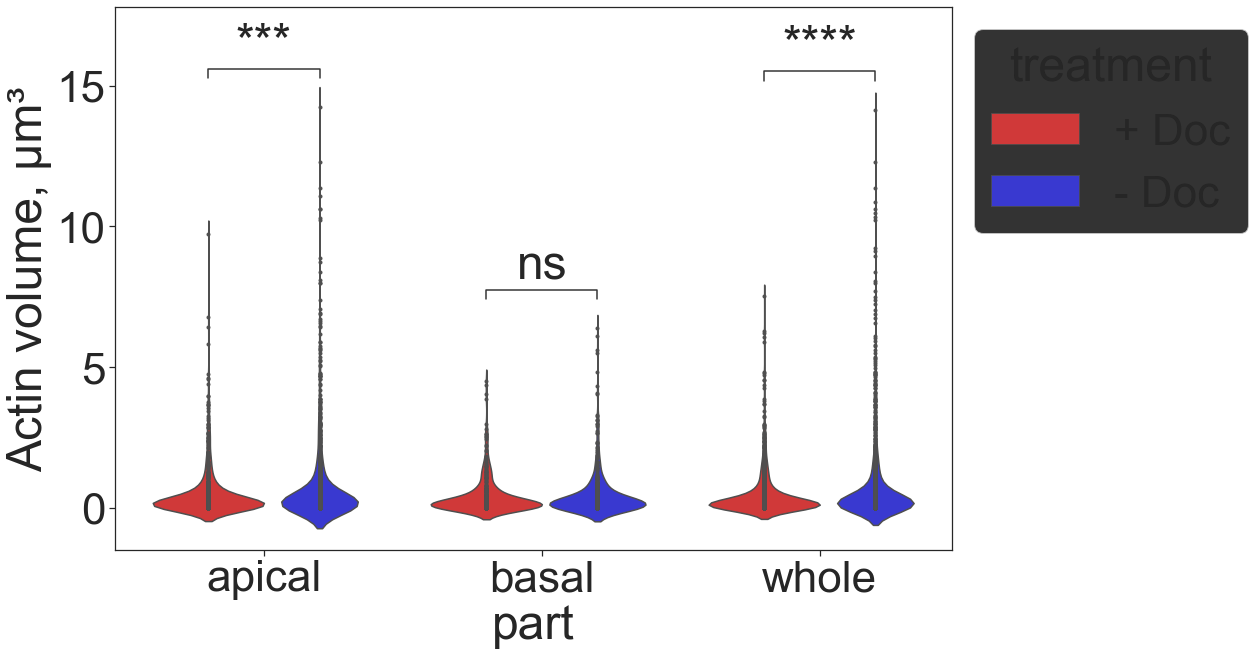

In [60]:
sns.set(font_scale=4, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")

# pal = ["red", "blue"]
pal = [(233/255, 32/255, 32/255), (32/255, 32/255, 233/255)]
significanceComparisons = [(('apical','+ Doc'), ('apical','- Doc')),
                           (('basal','+ Doc'), ('basal','- Doc')),
                           (('whole','+ Doc'), ('whole','- Doc'))]

fig_args = {'x': 'part',
            'y': 'Actin Volume',
            'hue':'treatment',
            'data': df_combined,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15},
            'transparent': True }

configuration = {'test':'t-test_ind',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin volume, µm\u00b3")
fig.savefig(f'actin_volume.png', format='png')


## Actin Xsection

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

basal_+ Doc vs. basal_- Doc: t-test independent samples, P_val:1.650e-01 t=-1.390e+00
apical_+ Doc vs. apical_- Doc: t-test independent samples, P_val:1.253e-02 t=-2.499e+00
whole_+ Doc vs. whole_- Doc: t-test independent samples, P_val:2.168e-03 t=-3.069e+00


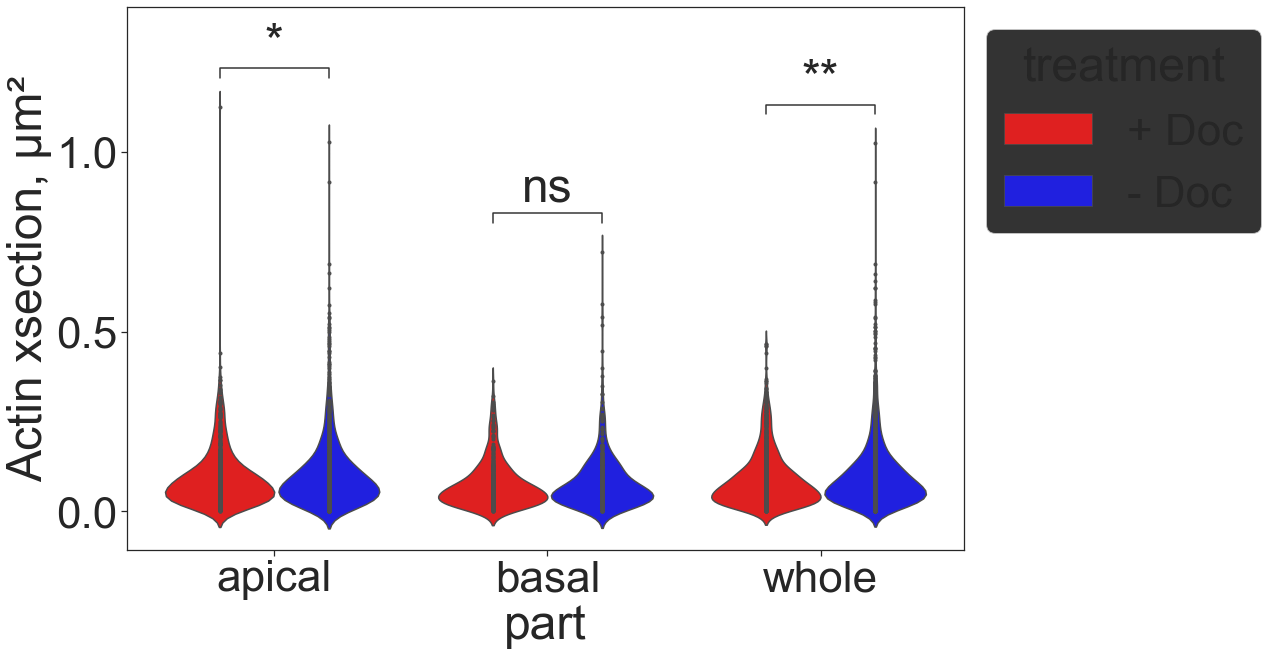

In [61]:
pal = ["red", "blue"]
significanceComparisons = [(('apical','+ Doc'), ('apical','- Doc')),
                           (('basal','+ Doc'), ('basal','- Doc')),
                           (('whole','+ Doc'), ('whole','- Doc'))]

fig_args = {'x': 'part',
            'y': 'Actin Xsection',
            'hue':'treatment',
            'data': df_combined,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15}}

configuration = {'test':'t-test_ind',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin xsection, µm\u00b2")
fig.savefig(f'actin_xsection.png', format='png')

## Actin Length

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

basal_+ Doc vs. basal_- Doc: t-test independent samples, P_val:5.356e-01 t=-6.197e-01
apical_+ Doc vs. apical_- Doc: t-test independent samples, P_val:1.515e-03 t=-3.176e+00
whole_+ Doc vs. whole_- Doc: t-test independent samples, P_val:1.555e-04 t=-3.787e+00


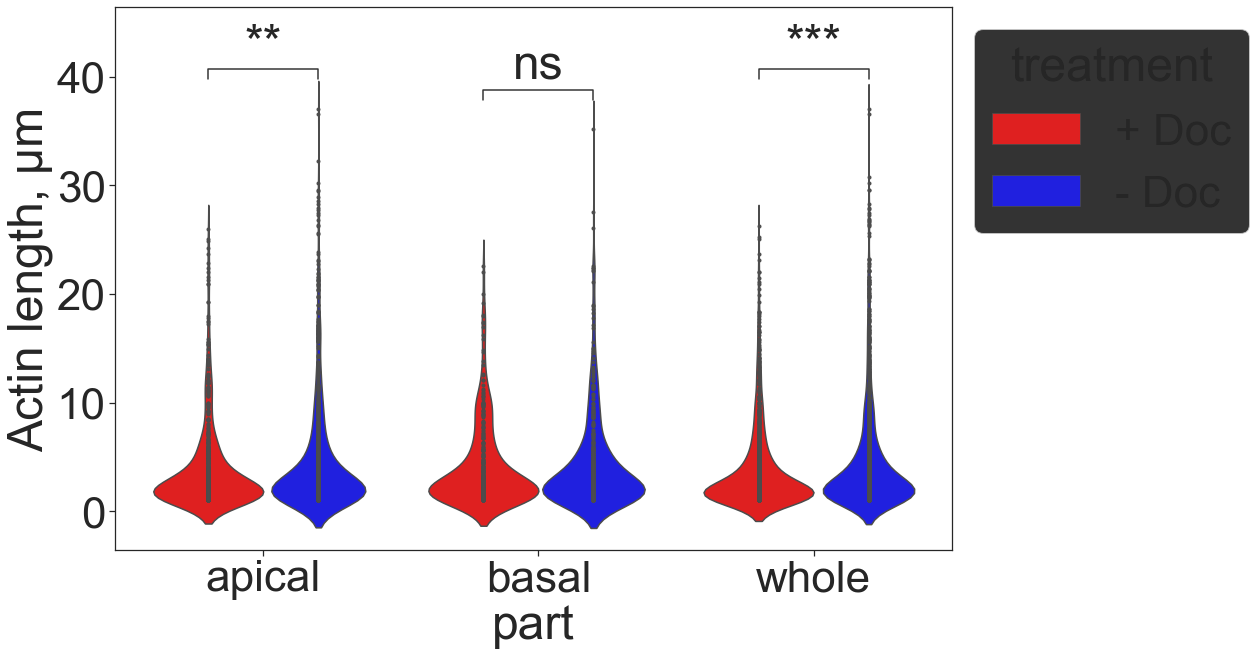

In [62]:
pal = ["red", "blue"]
significanceComparisons = [(('apical','+ Doc'), ('apical','- Doc')),
                           (('basal','+ Doc'), ('basal','- Doc')),
                           (('whole','+ Doc'), ('whole','- Doc'))]

fig_args = {'x': 'part',
            'y': 'Actin Length',
            'hue':'treatment',
            'data': df_combined,
            'dodge': True,
            'palette': pal,
            'inner' : 'point',
            'annot_kws': {"fontsize":15}}

configuration = {'test':'t-test_ind',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.violinplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Actin length, μm")
fig.savefig(f'actin_length.png', format='png')

## Histograms

In [63]:
test_df = df_combined[df_combined['part'] == 'whole']
test_df = test_df.assign(new_index=np.arange(0, len(test_df)))
test_df.index = test_df.new_index
test_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part,treatment,new_index
new_index,,,,,,,,,,,,,
0,2,12.05810,0.179090,2.159482,206,0,NaN,NaN,10,1,whole,+ Doc,0
1,99,11.29344,0.217937,2.461261,193,0,NaN,NaN,10,1,whole,+ Doc,1
2,14,10.64642,0.117889,1.255094,182,0,NaN,NaN,10,1,whole,+ Doc,2
3,69,9.88176,0.294370,2.908891,169,0,NaN,NaN,10,1,whole,+ Doc,3
4,56,9.35238,0.254946,2.384353,160,0,NaN,NaN,10,1,whole,+ Doc,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,1159,1.05876,0.091527,0.096905,19,0,NaN,NaN,8,2,whole,- Doc,2782
2783,1454,1.05876,0.042629,0.045134,19,0,NaN,NaN,8,2,whole,- Doc,2783
2784,1481,1.05876,0.043883,0.046461,19,0,NaN,NaN,8,2,whole,- Doc,2784


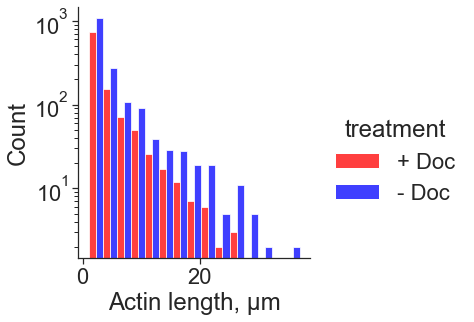

In [64]:
sns.set(font_scale=2, rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)}, style="ticks")

fig_args = {'x': 'Actin Length',
            'hue':'treatment',
            'data': test_df,
            'multiple': "dodge",
            'palette': pal,
            'log_scale' : (False, True),
            'bins': 15}


fig = sns.displot(**fig_args)
fig.set(xlabel="Actin length, μm")
fig.savefig(f'actin_length_hist.png', format='png')

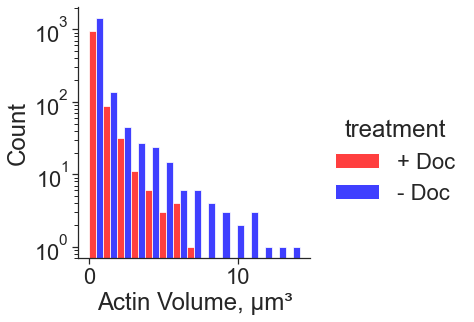

In [65]:
fig_args = {'x': 'Actin Volume',
            'hue':'treatment',
            'data': test_df,
            'multiple': "dodge",
            'palette': pal,
            'log_scale' : (False, True),
            'bins': 15}


fig = sns.displot(**fig_args)
fig.set(xlabel="Actin Volume, μm\u00b3")
fig.savefig(f'actin_volume_hist.png', format='png')

## Nucleus hight

In [66]:
file_path = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\data_match_removed_zeros_from_Nurbanu.csv"
general_df = pd.read_csv(file_path)
general_df

,Cell_num,cell_number,g,group,groups,grp,Nucleus volume,Nucleus length,Nucleus width,Nucleus hight,Total fiber number,Apical fiber number,Basal fiber number,Total fiber volume,Apical fiber volume,Basal fiber volume,Total fiber length,Apical fiber length,Basal fiber length
0,1,1,1,0,control,C-1,780.217109,19.29296,17.05780,4.530177,55,48,6,9.378548,6.694519,2.634323,147.10882,122.99262,21.93986
1,2,2,1,0,control,C-2,1503.604638,29.11590,19.93998,4.948805,124,84,40,58.250133,45.020941,12.295783,449.32598,334.80344,113.64024
2,3,3,1,0,control,C-3,1733.792653,39.82114,26.58664,3.129260,115,77,36,107.543180,85.701935,18.134130,625.84480,474.14802,116.69888
3,4,4,1,0,control,C-4,1639.504366,32.76274,28.64534,3.338105,134,107,30,71.015594,62.308584,9.165237,555.55490,467.85428,94.34728
4,6,5,1,0,control,C-5,693.567785,29.11590,16.58724,2.744139,57,51,8,49.811732,50.060460,2.091376,281.21842,261.33726,34.40970
5,7,6,1,0,control,C-6,1295.929025,20.41054,17.52836,6.921609,21,16,3,3.381203,2.310376,0.652752,43.11506,31.88044,5.52908
6,8,7,1,0,control,C-7,1033.486887,34.17442,14.17562,4.076462,48,31,19,23.595771,19.612951,4.122685,261.39608,187.28288,74.64258
7,9,8,1,0,control,C-8,1259.906099,21.41048,18.05774,6.226873,46,39,4,6.805757,6.361673,0.350507,139.87396,129.93338,7.70542
8,11,10,1,0,control,C-10,667.648093,29.23354,16.76370,2.603262,44,41,5,22.601709,21.560843,1.033630,212.45784,200.45856,14.46972
9,12,11,1,0,control,C-11,790.396476,24.76322,19.58706,3.113797,21,21,7,8.066192,7.366789,1.060582,69.76052,54.40850,26.70428


<AxesSubplot:xlabel='groups', ylabel='Nucleus hight'>

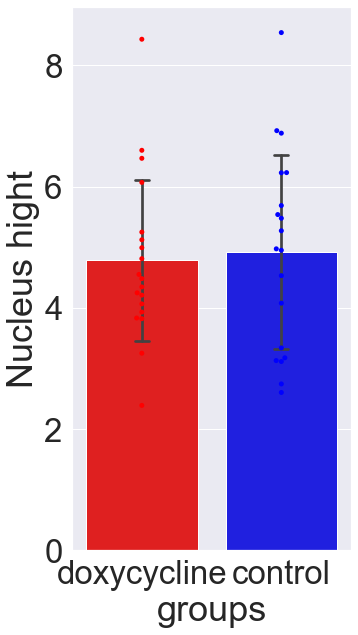

In [67]:
sns.set(font_scale=3)

a4_dims = (5, 10)

fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x = "groups", y = "Nucleus hight", data = general_df, palette=pal, order=['doxycycline', 'control'], capsize=.1, ci="sd")
sns.swarmplot(ax=ax, x = "groups", y = "Nucleus hight", data = general_df, palette=pal, order=['doxycycline', 'control'], color="0", alpha=1)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

doxycycline vs. control: t-test independent samples, P_val:7.622e-04 t=-3.678e+00


Text(-5.25, 0.5, 'Nucleus length, μm')

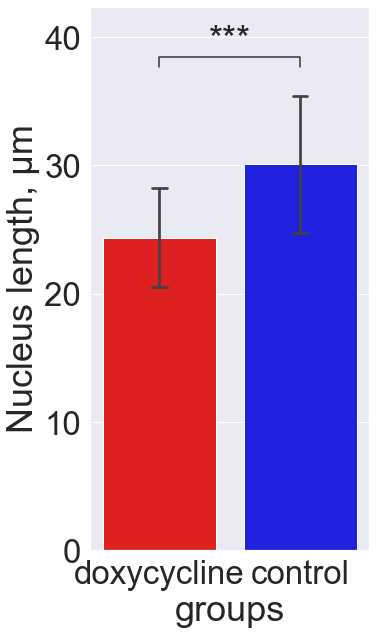

In [68]:
sns.set(font_scale=3)

a4_dims = (5, 10)
fig, ax = plt.subplots(figsize=a4_dims)
fig_args = {
            'x': 'groups',
            'y': 'Nucleus length',
            'data': general_df,
            'palette': pal,
            'capsize' : .1,
            'ci' : "sd",
            'order' : ['doxycycline', 'control']}


sns.barplot(ax=ax, **fig_args)

significanceComparisons = [("doxycycline",'control')]

configuration = {'test':'t-test_ind',
                 'comparisons_correction':None,
                 'text_format':'star'}


annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args)
annotator.configure(**configuration).apply_test().annotate()

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Nucleus length, μm")



In [69]:
plus_doc_nuc_len = general_df[general_df['groups'] == "doxycycline"]['Nucleus length']
minus_doc_nuc_len = general_df[general_df['groups'] == "control"]['Nucleus length']

In [70]:
stat, pvalue = scipy.stats.ttest_ind(
            plus_doc_nuc_len,
            minus_doc_nuc_len
        )
pvalue

0.0007622480202048153

In [71]:
#Mean
mean_doc = np.mean(plus_doc_nuc_len)
mean_cnt = np.mean(minus_doc_nuc_len)
dif = (mean_cnt - mean_doc) * 100/mean_doc
dif

23.453968253968263

#### Actin length difference and p-value

In [72]:
# Actin len cap

actin_cap = df_combined[df_combined['part'] == 'apical']
mean_actin_len_doc_cap = np.mean(actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Length'])

mean_actin_len_cnt_cap = np.mean(actin_cap[actin_cap['treatment'] == '- Doc']['Actin Length'])

dif = (mean_actin_len_cnt_cap - mean_actin_len_doc_cap) * 100/mean_actin_len_cnt_cap
dif

15.744107870603557

In [73]:
_, pvalue_len_cap = scipy.stats.ttest_ind(
            actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Length'],
            actin_cap[actin_cap['treatment'] == '- Doc']['Actin Length']
        )
pvalue_len_cap

0.0015148922142772304

In [74]:
# Actin len total

actin_whole = df_combined[df_combined['part'] == 'whole']
mean_actin_len_doc_whole = np.mean(actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Length'])

mean_actin_len_cnt_whole = np.mean(actin_whole[actin_whole['treatment'] == '- Doc']['Actin Length'])

dif = (mean_actin_len_cnt_whole - mean_actin_len_doc_whole) * 100/mean_actin_len_cnt_whole
dif

15.253665488864968

In [75]:
_, pvalue_len_whole = scipy.stats.ttest_ind(
            actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Length'],
            actin_whole[actin_whole['treatment'] == '- Doc']['Actin Length']
        )
pvalue_len_whole

0.0001555074296384025

#### Actin xsection difference and p-value

In [76]:
# Actin xscetion cap

actin_cap = df_combined[df_combined['part'] == 'apical']
mean_actin_xsection_doc_cap = np.mean(actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Xsection'])

mean_actin_xsection_cnt_cap = np.mean(actin_cap[actin_cap['treatment'] == '- Doc']['Actin Xsection'])

dif = (mean_actin_xsection_cnt_cap - mean_actin_xsection_doc_cap) * 100/mean_actin_xsection_cnt_cap
dif

10.51119124143272

In [77]:
_, pvalue_xscetion_cap = scipy.stats.ttest_ind(
            actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Xsection'],
            actin_cap[actin_cap['treatment'] == '- Doc']['Actin Xsection']
        )
pvalue_xscetion_cap

0.012532547457386188

In [78]:
# Actin xscetion whole

actin_whole = df_combined[df_combined['part'] == 'whole']
mean_actin_xscetion_doc_whole = np.mean(actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Xsection'])

mean_actin_xscetion_cnt_whole = np.mean(actin_whole[actin_whole['treatment'] == '- Doc']['Actin Xsection'])

dif = (mean_actin_xscetion_cnt_whole - mean_actin_xscetion_doc_whole) * 100/mean_actin_xscetion_cnt_whole
dif

10.61989120009621

In [79]:
_, pvalue_len_whole = scipy.stats.ttest_ind(
            actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Xsection'],
            actin_whole[actin_whole['treatment'] == '- Doc']['Actin Xsection']
        )
pvalue_len_whole

0.0021681359556143098

#### Actin volume difference and p-value

In [80]:
# Actin volume cap

mean_actin_vol_doc_cap = np.mean(actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Volume'])
mean_actin_vol_cnt_cap = np.mean(actin_cap[actin_cap['treatment'] == '- Doc']['Actin Volume'])

dif = (mean_actin_vol_cnt_cap - mean_actin_vol_doc_cap) * 100/mean_actin_vol_cnt_cap
dif

32.5219570039238

In [81]:
_, pvalue_vol_cap = scipy.stats.ttest_ind(
            actin_cap[actin_cap['treatment'] == '+ Doc']['Actin Volume'],
            actin_cap[actin_cap['treatment'] == '- Doc']['Actin Volume']
        )
pvalue_vol_cap

0.0001409188233120934

In [82]:
# Actin volume total

mean_actin_vol_doc_whole = np.mean(actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Volume'])
mean_actin_vol_cnt_whole = np.mean(actin_whole[actin_whole['treatment'] == '- Doc']['Actin Volume'])

dif = (mean_actin_vol_cnt_whole - mean_actin_vol_doc_whole) * 100/mean_actin_vol_cnt_whole
dif

30.689490146041905

In [83]:
_, pvalue_vol_whole = scipy.stats.ttest_ind(
            actin_whole[actin_whole['treatment'] == '+ Doc']['Actin Volume'],
            actin_whole[actin_whole['treatment'] == '- Doc']['Actin Volume']
        )
pvalue_vol_whole

1.4438183736660856e-05